In [55]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [56]:
"""
import os 
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('../input/ekush-bangla-dataset/Ekush_dataset_Balanced/Test')
data_dir_list.sort()
print(data_dir_list)
path, dirs, files = next(os.walk("../input/ekush-bangla-dataset/Ekush_dataset_Balanced/Test"))
"""

'\nimport os \nimport warnings\nwarnings.filterwarnings(\'ignore\')\n# Get all the paths\ndata_dir_list = os.listdir(\'../input/ekush-bangla-dataset/Ekush_dataset_Balanced/Test\')\ndata_dir_list.sort()\nprint(data_dir_list)\npath, dirs, files = next(os.walk("../input/ekush-bangla-dataset/Ekush_dataset_Balanced/Test"))\n'

In [57]:
"""
import matplotlib.pyplot as plt
nimgs = {}
maximum =0
minimum=1e9
for i in data_dir_list:
    nimages = len(os.listdir('../input/ekush-bangla-dataset/Ekush_dataset_Balanced/Train/'+i+'/'))
    nimgs[i]=nimages
    maximum=max(maximum,nimages)
    minimum=min(minimum,nimages)
    print(f"{i} classes number of images :{nimages}\n")
print(f"Maximum value of particular class: {maximum}")
print(f"Minimum value of particular class: {minimum}")
plt.figure(figsize=(84, 5))
plt.bar(range(len(nimgs)), list(nimgs.values()),align ="center")
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nnimgs = {}\nmaximum =0\nminimum=1e9\nfor i in data_dir_list:\n    nimages = len(os.listdir(\'../input/ekush-bangla-dataset/Ekush_dataset_Balanced/Train/\'+i+\'/\'))\n    nimgs[i]=nimages\n    maximum=max(maximum,nimages)\n    minimum=min(minimum,nimages)\n    print(f"{i} classes number of images :{nimages}\n")\nprint(f"Maximum value of particular class: {maximum}")\nprint(f"Minimum value of particular class: {minimum}")\nplt.figure(figsize=(84, 5))\nplt.bar(range(len(nimgs)), list(nimgs.values()),align ="center")\nplt.xticks(range(len(nimgs)), list(nimgs.keys()))\nplt.title(\'Distribution of different classes in Training Dataset\')\nplt.show()\n'

In [58]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [59]:
TRAINING_DIR = '../input/small-data-set/Dataset/Train'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range = 0.01, # Randomly zoom image 
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=False,  # randomly flip images
                                   vertical_flip=False  
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64),
                                                    )

Found 12000 images belonging to 50 classes.


In [60]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/small-data-set/Dataset/Test',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 3000 images belonging to 50 classes.


In [61]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/small-data-set/Dataset/Test',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 3000 images belonging to 50 classes.


In [62]:
import os 
import warnings
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers, activations

In [63]:

classifier=Sequential()

classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu", input_shape=(64,64,3)))
classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())  
classifier.add(Dropout(.2))  

classifier.add(Conv2D(filters=256, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.2))
    
classifier.add(Flatten())

classifier.add(Dense(512,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(256,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(128,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dropout(.2))
    
classifier.add(Dense(50,activation="softmax"))




In [64]:
classifier.compile(loss='categorical_crossentropy', 
                metrics=['accuracy'],
                optimizer=Adam(learning_rate=0.00004))

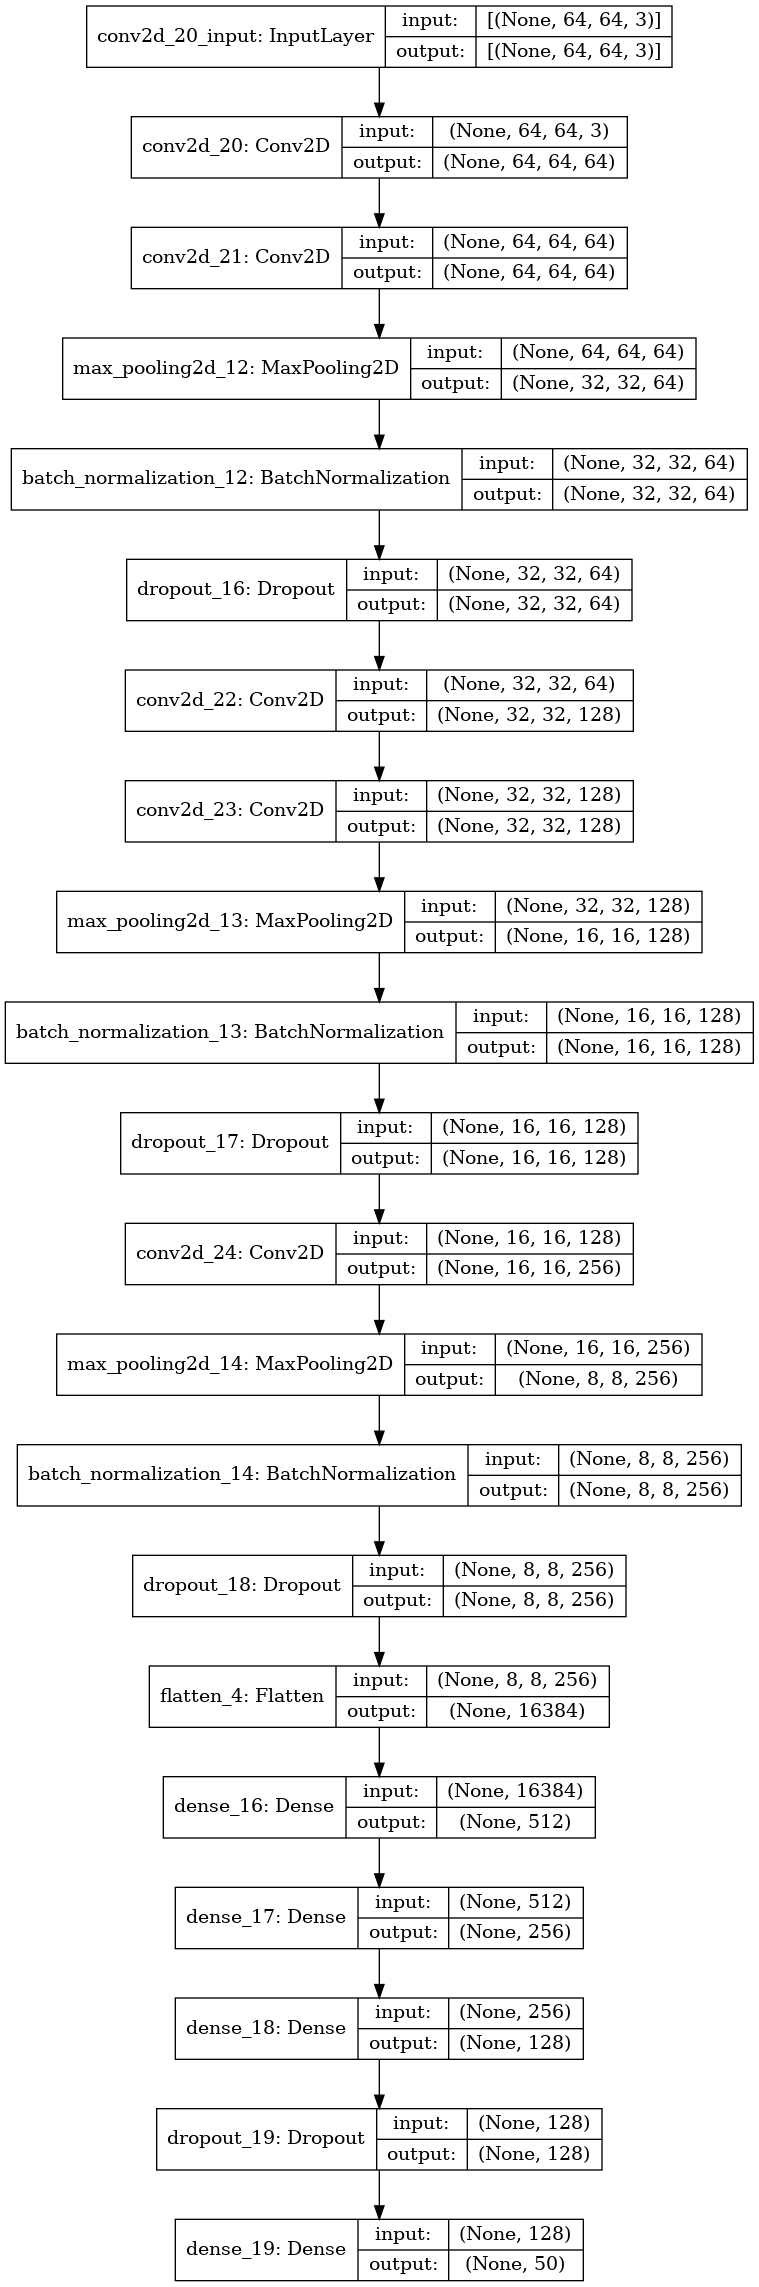

In [65]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, 'Architecture.png', show_shapes=True)

In [66]:
#Details for model
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)      

In [67]:
"""
from google.colab import files
files.download('Architecture.png')
"""

"\nfrom google.colab import files\nfiles.download('Architecture.png')\n"

In [68]:
filepath = "Final_Model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [71]:
history = classifier.fit(train_generator,steps_per_epoch = len(train_generator), epochs = 50,
                        validation_data = val_generator, validation_steps =  len(val_generator),callbacks=callbacks_list)

Epoch 1/50
94/94 [==============================] - 26s 282ms/step - loss: 2.8412 - accuracy: 0.6138 - val_loss: 2.8658 - val_accuracy: 0.6167

Epoch 00001: val_loss improved from 4.84272 to 2.86578, saving model to Final_Model.h5
Epoch 2/50
94/94 [==============================] - 27s 291ms/step - loss: 2.6864 - accuracy: 0.6510 - val_loss: 2.1748 - val_accuracy: 0.8167

Epoch 00002: val_loss improved from 2.86578 to 2.17481, saving model to Final_Model.h5
Epoch 3/50
94/94 [==============================] - 27s 287ms/step - loss: 2.5755 - accuracy: 0.6837 - val_loss: 1.9871 - val_accuracy: 0.8570

Epoch 00003: val_loss improved from 2.17481 to 1.98707, saving model to Final_Model.h5
Epoch 4/50
94/94 [==============================] - 26s 275ms/step - loss: 2.4523 - accuracy: 0.7122 - val_loss: 1.8771 - val_accuracy: 0.8837

Epoch 00004: val_loss improved from 1.98707 to 1.87706, saving model to Final_Model.h5
Epoch 5/50
94/94 [==============================] - 26s 279ms/step - loss: 2

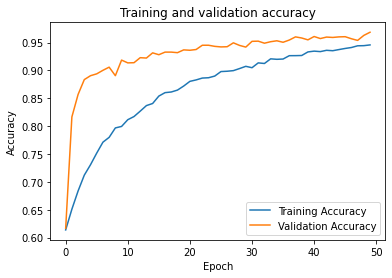

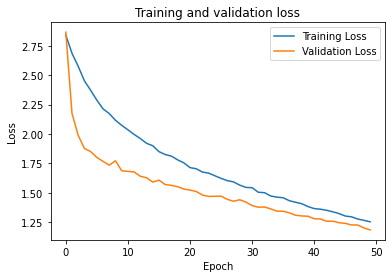

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [73]:
loss_t, accuracy_t = classifier.evaluate(train_generator, steps=32)
loss, accuracy = classifier.evaluate(test_generator,steps=32)
loss_v, accuracy_v = classifier.evaluate(val_generator, steps=32)
print("\nTrain: accuracy = %f  ;  loss_v = %f\n" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  ;  loss_v = %f\n" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f\n" % (accuracy, loss))


32/32 [==============================] - 2s 73ms/step - loss: 1.1836 - accuracy: 0.9687

Train: accuracy = 0.974365  ;  loss_v = 1.168727

Validation: accuracy = 0.968667  ;  loss_v = 1.183645

Test: accuracy = 0.968667  ;  loss = 1.183645

